In [1]:
import numpy as np
#from scipy import misc
from skimage.io import imread, imsave
from skimage import exposure, color
from skimage import img_as_ubyte, img_as_float
import matplotlib.pyplot as plt
#import matplotlib.pylab as pylab

In [2]:
from scipy.ndimage import convolve, correlate
from scipy.signal import convolve as sg_convolve
from scipy.signal import correlate as sg_correlate
from scipy.signal import convolve2d, correlate2d
from scipy.ndimage import uniform_filter, median_filter
#
from scipy.ndimage import gaussian_filter

Examples of convolution using scipy.ndimage.convolve and scipy.signal.convolve2d, respectively. They can be used interchangeably, but note the difference in the function arguments. 

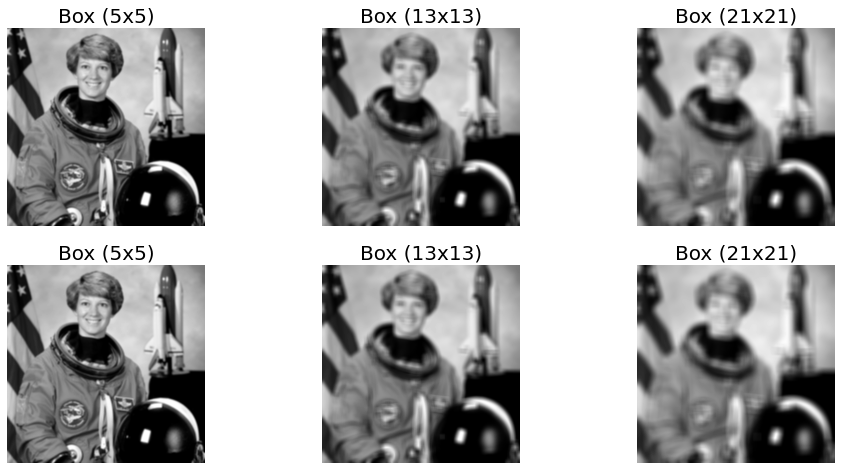

In [3]:
im = imread('images/astronaut_original.png')
#im = imread('images/testpattern512.tif')

# im_rgb = io.imread('images/pepper.tiff')/255
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,8),sharex=True,sharey=True)
ax=axes.ravel()

box_kernel = (np.ones((5,5))/25)
im_box_blur = np.ones(im.shape)
im_box_blur = convolve2d(im,box_kernel, boundary='symm', mode='same')
plt.subplot(2,3,1), plt.imshow(im_box_blur, cmap=plt.cm.gray)
plt.title('Box (5x5)', size=20), plt.axis('off')

box_kernel = (np.ones((13,13))/169)
im_box_blur = np.ones(im.shape)
im_box_blur = convolve2d(im,box_kernel, boundary='symm', mode='same')
plt.subplot(2,3,2), plt.imshow(im_box_blur, cmap=plt.cm.gray)
plt.title('Box (13x13)', size=20), plt.axis('off')

box_kernel = (np.ones((21,21))/441)
im_box_blur = np.ones(im.shape)
im_box_blur = convolve2d(im,box_kernel, boundary='symm', mode='same')
plt.subplot(2,3,3), plt.imshow(im_box_blur, cmap=plt.cm.gray)
plt.title('Box (21x21)', size=20), plt.axis('off')


box_kernel = (np.ones((5,5))/25)
im_box_blur = np.ones(im.shape)
im_box_blur = convolve(im,box_kernel, mode='reflect')
plt.subplot(2,3,4), plt.imshow(im_box_blur, cmap=plt.cm.gray)
plt.title('Box (5x5)', size=20), plt.axis('off')

box_kernel = (np.ones((13,13))/169)
im_box_blur = np.ones(im.shape)
im_box_blur = convolve(im,box_kernel, mode='reflect')
plt.subplot(2,3,5), plt.imshow(im_box_blur, cmap=plt.cm.gray)
plt.title('Box (13x13)', size=20), plt.axis('off')

box_kernel = (np.ones((21,21))/441)
im_box_blur = np.ones(im.shape)
im_box_blur = convolve(im,box_kernel, mode='reflect')
plt.subplot(2,3,6), plt.imshow(im_box_blur, cmap=plt.cm.gray)
plt.title('Box (21x21)', size=20), plt.axis('off')

plt.tight_layout
plt.show()

Examples of filtering using correlation using scipy.ndimage.correlate and scipy.signal.correlate2d, respectively. The resuts are the same as those using convolution because the kernels are symmetric. 

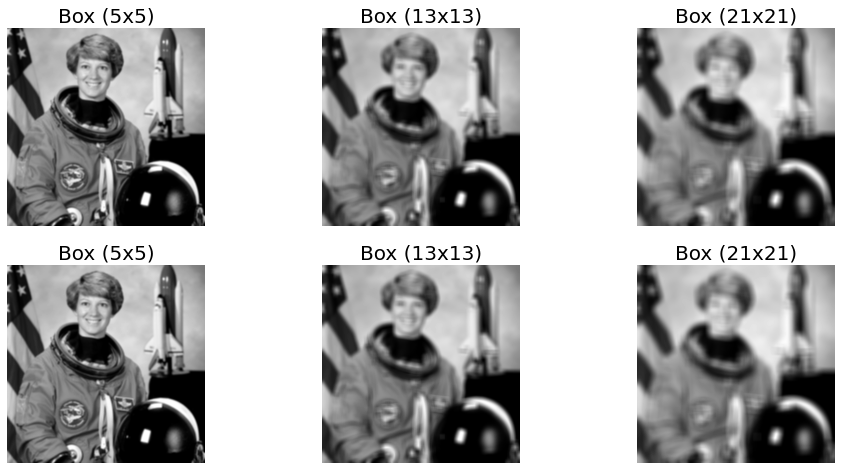

In [4]:
im = imread('images/astronaut_original.png')
#im = imread('images/testpattern512.tif')

# im_rgb = io.imread('images/pepper.tiff')/255
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,8),sharex=True,sharey=True)
ax=axes.ravel()

box_kernel = (np.ones((5,5))/25)
im_box_blur = np.ones(im.shape)
im_box_blur = correlate2d(im,box_kernel,boundary='symm', mode='same')
plt.subplot(2,3,1), plt.imshow(im_box_blur, cmap=plt.cm.gray)
plt.title('Box (5x5)', size=20), plt.axis('off')

box_kernel = (np.ones((13,13))/169)
im_box_blur = np.ones(im.shape)
im_box_blur = correlate2d(im,box_kernel,boundary='symm', mode='same')
plt.subplot(2,3,2), plt.imshow(im_box_blur, cmap=plt.cm.gray)
plt.title('Box (13x13)', size=20), plt.axis('off')

box_kernel = (np.ones((21,21))/441)
im_box_blur = np.ones(im.shape)
im_box_blur = correlate2d(im,box_kernel,boundary='symm', mode='same')
plt.subplot(2,3,3), plt.imshow(im_box_blur, cmap=plt.cm.gray)
plt.title('Box (21x21)', size=20), plt.axis('off')


box_kernel = (np.ones((5,5))/25)
im_box_blur = np.ones(im.shape)
im_box_blur = correlate(im,box_kernel,mode='reflect')
plt.subplot(2,3,4), plt.imshow(im_box_blur, cmap=plt.cm.gray)
plt.title('Box (5x5)', size=20), plt.axis('off')

box_kernel = (np.ones((13,13))/169)
im_box_blur = np.ones(im.shape)
im_box_blur = correlate(im,box_kernel,mode='reflect')
plt.subplot(2,3,5), plt.imshow(im_box_blur, cmap=plt.cm.gray)
plt.title('Box (13x13)', size=20), plt.axis('off')

box_kernel = (np.ones((21,21))/441)
im_box_blur = np.ones(im.shape)
im_box_blur = correlate(im,box_kernel,mode='reflect')
plt.subplot(2,3,6), plt.imshow(im_box_blur, cmap=plt.cm.gray)
plt.title('Box (21x21)', size=20), plt.axis('off')

plt.tight_layout
plt.show()

Filtering for color images. Can not use scipy.signal.convolve2d or correlate2d because they are for 2D images.  

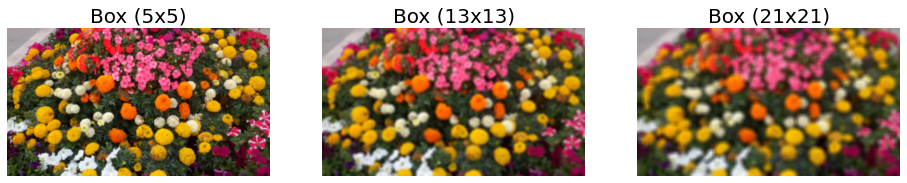

In [5]:
im = img_as_float(imread('images/flowers.png'))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8),sharex=True,sharey=True)
ax=axes.ravel()

box_kernel = (np.ones((5,5))/25).reshape(5,5,1)
im_box_blur = np.ones(im.shape)
im_box_blur = np.clip(convolve(im,box_kernel,mode='reflect'),0,1)
plt.subplot(1,3,1), plt.imshow(im_box_blur)
plt.title('Box (5x5)', size=20), plt.axis('off')

box_kernel = (np.ones((13,13))/169).reshape(13,13,1)
im_box_blur = np.ones(im.shape)
im_box_blur = np.clip(convolve(im,box_kernel,mode='reflect'),0,1)
plt.subplot(1,3,2), plt.imshow(im_box_blur)
plt.title('Box (13x13)', size=20), plt.axis('off')

box_kernel = (np.ones((21,21))/441).reshape(21,21,1)
im_box_blur = np.ones(im.shape)
im_box_blur = np.clip(convolve(im,box_kernel,mode='reflect'),0,1)
plt.subplot(1,3,3), plt.imshow(im_box_blur)
plt.title('Box (21x21)', size=20), plt.axis('off')

plt.tight_layout
plt.show()

Filtering for color images using scipy.signal.convolve or correlate. 

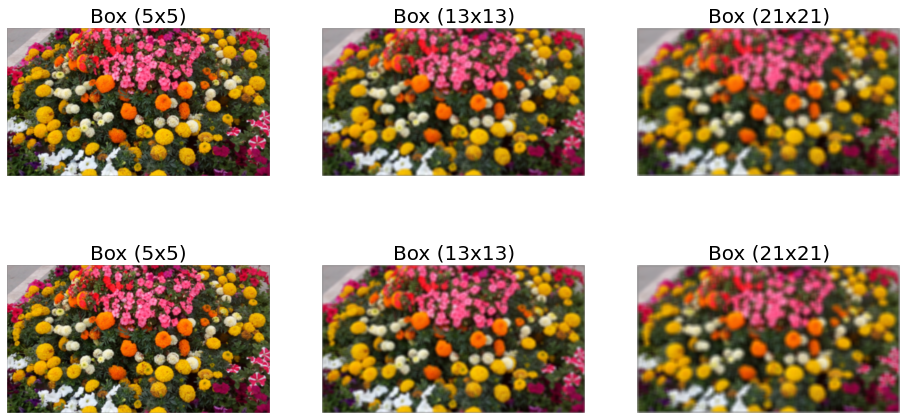

In [12]:
im = img_as_float(imread('images/flowers.png'))
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,8),sharex=True,sharey=True)
ax=axes.ravel()

box_kernel = (np.ones((5,5))/25).reshape(5,5,1)
im_box_blur = np.zeros(im.shape)
im_box_blur = np.clip(sg_convolve(im,box_kernel,mode='same'),0,1)
plt.subplot(2,3,1), plt.imshow(im_box_blur)
plt.title('Box (5x5)', size=20), plt.axis('off')

box_kernel = (np.ones((13,13))/169).reshape(13,13,1)
im_box_blur = np.zeros(im.shape)
im_box_blur = np.clip(sg_convolve(im,box_kernel,mode='same'),0,1)
plt.subplot(2,3,2), plt.imshow(im_box_blur)
plt.title('Box (13x13)', size=20), plt.axis('off')

box_kernel = (np.ones((21,21))/441).reshape(21,21,1)
im_box_blur = np.zeros(im.shape)
im_box_blur = np.clip(sg_convolve(im,box_kernel,mode='same'),0,1)
plt.subplot(2,3,3), plt.imshow(im_box_blur)
plt.title('Box (21x21)', size=20), plt.axis('off')

box_kernel = (np.ones((5,5))/25).reshape(5,5,1)
im_box_blur = np.zeros(im.shape)
im_box_blur = np.clip(sg_correlate(im,box_kernel,mode='same'),0,1)
plt.subplot(2,3,4), plt.imshow(im_box_blur)
plt.title('Box (5x5)', size=20), plt.axis('off')

box_kernel = (np.ones((13,13))/169).reshape(13,13,1)
im_box_blur = np.zeros(im.shape)
im_box_blur = np.clip(sg_correlate(im,box_kernel,mode='same'),0,1)
plt.subplot(2,3,5), plt.imshow(im_box_blur)
plt.title('Box (13x13)', size=20), plt.axis('off')

box_kernel = (np.ones((21,21))/441).reshape(21,21,1)
im_box_blur = np.zeros(im.shape)
im_box_blur = np.clip(sg_correlate(im,box_kernel,mode='same'),0,1)
plt.subplot(2,3,6), plt.imshow(im_box_blur)
plt.title('Box (21x21)', size=20), plt.axis('off')


plt.tight_layout
plt.show()

scipy.ndimag.gaussian_filter implements filtering using Gaussian filtering. Exercise: Write a function to create a Gaussian filter with given size and standard deviation, then use a convolution function and a gaussian kernel to do filtering. Compare the results with the ones using scipy.ndimag.gaussian_filter.

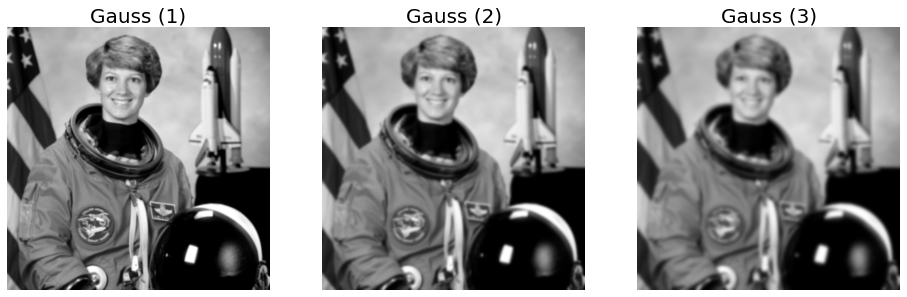

In [3]:
im = img_as_float(imread('images/astronaut_original.png'))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8),sharex=True,sharey=True)
ax=axes.ravel()

im_gauss_blur = np.zeros(im.shape)
im_gauss_blur = gaussian_filter(im,sigma=1.0,mode='reflect')
plt.subplot(1,3,1), plt.imshow(im_gauss_blur,cmap=plt.cm.gray)
plt.title('Gauss (1)', size=20), plt.axis('off')

im_gauss_blur = gaussian_filter(im,sigma=2,mode='reflect')
plt.subplot(1,3,2), plt.imshow(im_gauss_blur,cmap=plt.cm.gray)
plt.title('Gauss (2)', size=20), plt.axis('off')

im_gauss_blur = np.clip(gaussian_filter(im,sigma=3,mode='reflect'),0,1)
plt.subplot(1,3,3), plt.imshow(im_gauss_blur,cmap=plt.cm.gray)
plt.title('Gauss (3)', size=20), plt.axis('off')



plt.tight_layout
plt.show()

In [3]:
im = imread('images/astronaut_original.png')
im_med = median_filter(im, size=(7,7))

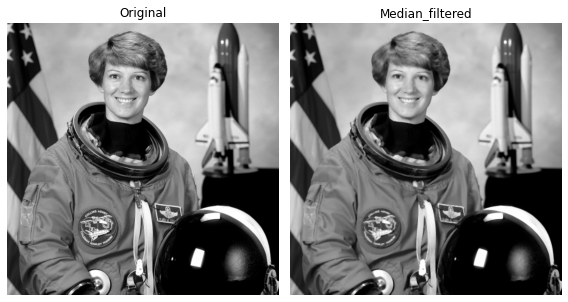

In [9]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(8,8),sharex=True,sharey=True)
ax=axes.ravel()
ax[0].imshow(im,cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(im_med,cmap=plt.cm.gray)
ax[1].set_title('Median_filtered')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()